In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns
# Créer un tableau de données
import requests

def download(url, filename):
    response = requests.get(url).content
    
    with open(filename, "wb") as f:
            f.write(response)

In [3]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [4]:
file_name = "usedcars.csv"
df = pd.read_csv(file_name)

In [5]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# 1. Linear Regression and Multiple-Linear Regression

In [ ]:
!pip install sklearn

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lm = LinearRegression()
lm

LinearRegression()

In [11]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)

LinearRegression()

In [12]:
lm.coef_

array([-821.73337832])

In [13]:
lm.intercept_

38423.3058581574

In [15]:
lm.predict(X)[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [29]:
lm1 = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm1.fit(Z, df[["price"]])

LinearRegression()

In [30]:
lm1.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [31]:
lm1.intercept_

array([-15806.62462633])

# 2. Model Evaluation Using Visualisation 

## Regplot

(0.0, 48170.23907239812)

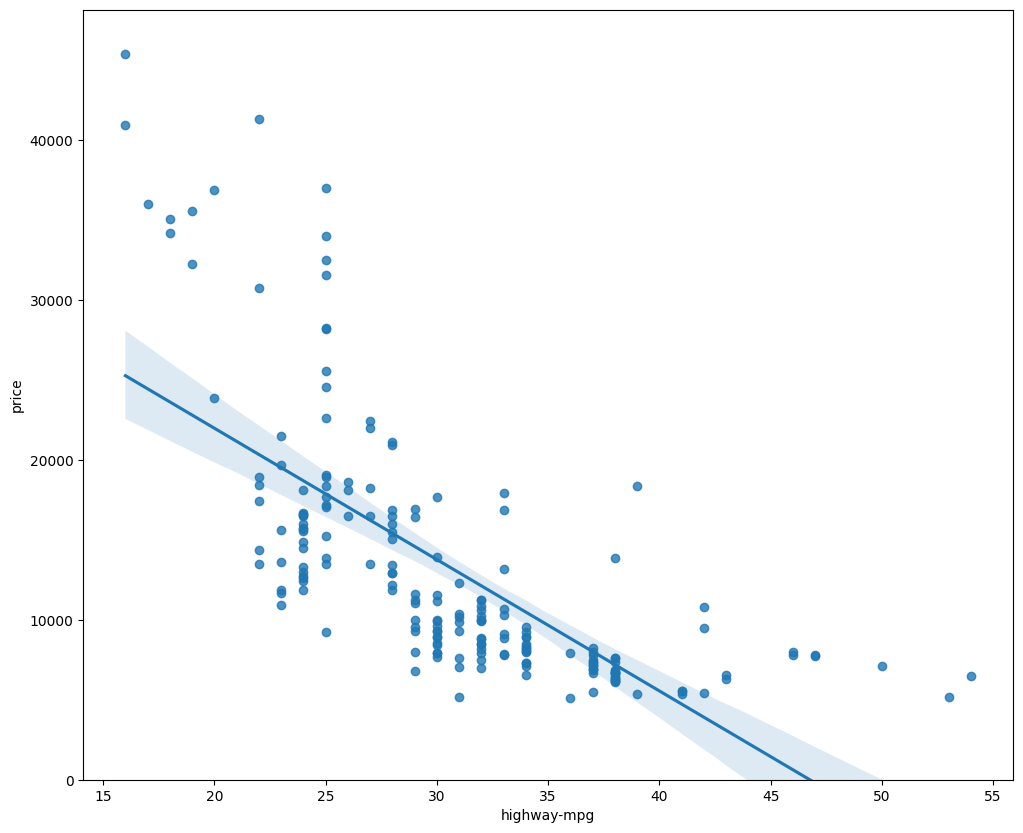

In [22]:
width = 12
height = 10
plt.figure(figsize = (width, height))
sns.regplot(x="highway-mpg", y="price", data = df)
plt.ylim(0,)

(0.0, 47414.1)

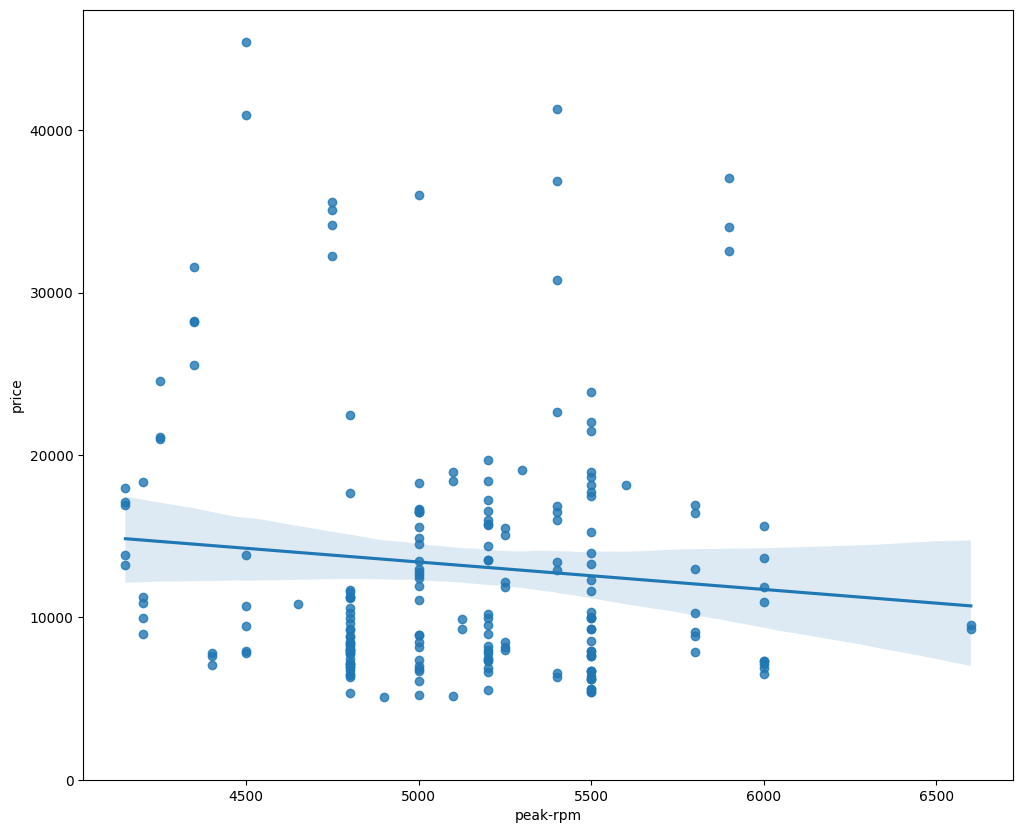

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

## Residual plot

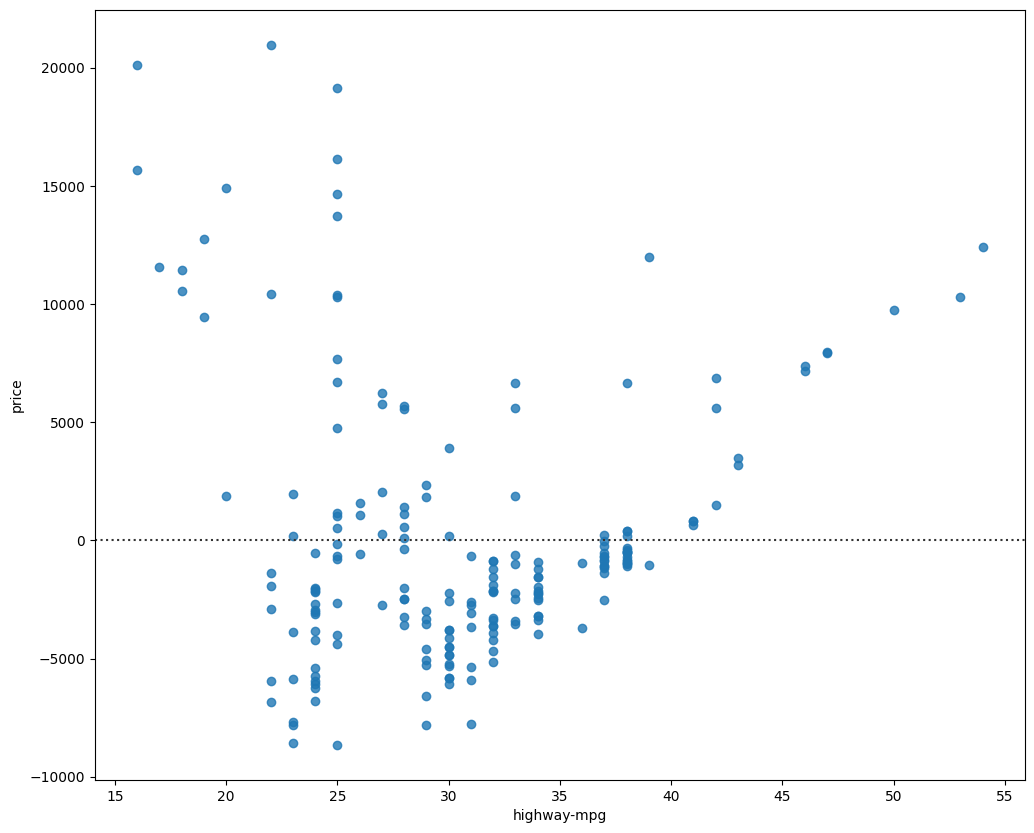

In [26]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

## Multiple Linear Regression

In [32]:
Y_hat = lm1.predict(Z)

C:\Users\USER2\AppData\Local\Temp\ipykernel_14732\373618801.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\USER2\AppData\Local\Temp\ipykernel_14732\373618801.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

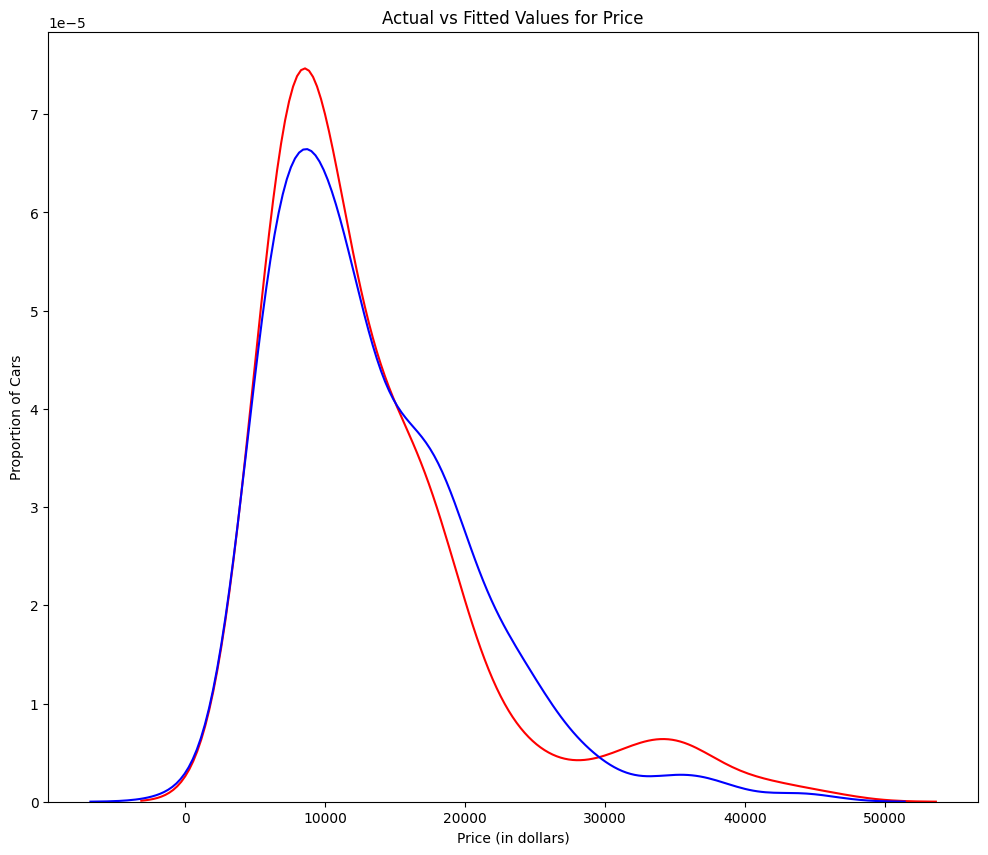

In [38]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# 3. Polynomial Regression

In [39]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [40]:
x = df['highway-mpg']
y = df['price']

In [51]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


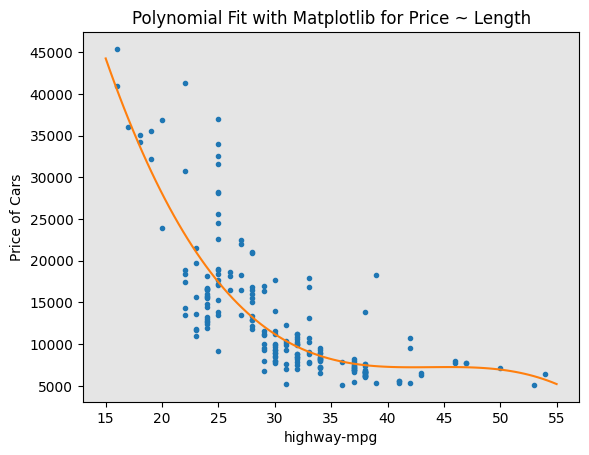

In [52]:
PlotPolly(p, x, y, 'highway-mpg')

In [53]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [56]:
Z_pr=pr.fit_transform(Z)

In [57]:
Z.shape

(201, 4)

## Pipeline

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [59]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [60]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [61]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

# 4. Measures for In-Sample Evaluation

In [62]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [63]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [66]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [67]:
Y_predict_multifit = lm.predict(Z)

In [68]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [70]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906515


In [ ]:
mean_squared_error(df['price'], p(x))